# Data Exploration and Visualization

Data exploration involves the initial investigation of a dataset to comprehend its inherent patterns and characteristics. Analysts focus on summarizing key statistical measures, identifying outliers, and uncovering trends, helping to inform subsequent analysis steps. This process is essential for gaining a foundational understanding of the data before more in-depth analyses or modeling.

Data visualization, on the other hand, is the presentation of data in graphical or visual formats. The goal is to make complex datasets more accessible and interpretable, allowing stakeholders to quickly grasp insights and patterns. Visualizations, ranging from charts and graphs to interactive dashboards, serve as powerful tools for conveying information effectively and aiding decision-making processes based on the identified patterns in the data.

<img src= "https://www.researchgate.net/publication/316939997/figure/fig2/AS:754454781513730@1556887445595/Visualization-mosaic-produced-from-canonical-datasets-generated-by-edx2bigquery-many-are.ppm" >

# Data Exploration and Visualization

Data exploration involves the initial investigation of a dataset to comprehend its inherent patterns and characteristics. Analysts focus on summarizing key statistical measures, identifying outliers, and uncovering trends, helping to inform subsequent analysis steps. This process is essential for gaining a foundational understanding of the data before more in-depth analyses or modeling.

Data visualization, on the other hand, is the presentation of data in graphical or visual formats. The goal is to make complex datasets more accessible and interpretable, allowing stakeholders to quickly grasp insights and patterns. Visualizations, ranging from charts and graphs to interactive dashboards, serve as powerful tools for conveying information effectively and aiding decision-making processes based on the identified patterns in the data.

![image](Visualization image.png)

We will conduct a comprehensive analysis of Houston's demographic and socio-economic trends over the years, leveraging a dataset specific to the region. Our focus will encompass the growth of the population, advancements in education, and fluctuations in median house prices. To facilitate a visual representation of these changes, we plan to employ geopandas, a powerful geospatial data analysis library.

The dataset at our disposal includes acronyms for variable references, and we have a dedicated document in the folder providing definitions for these acronyms.

In [144]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
# Install the geopandas library using the pip package manager
# The exclamation mark (!) is used to run shell commands from within a Jupyter notebook or a command-line interface.
# In this case, it is used to execute the 'pip install' command.

!pip install geopandas

In [146]:
# Import the geopandas library and alias it as 'gpd'
# This allows you to reference the library using the shorter alias 'gpd' throughout your code.

import geopandas as gpd

In [148]:
# Import the 'ogr' module from the 'osgeo' library
# 'ogr' stands for OGR Simple Features Library, and it is used for reading and writing geospatial data formats.

from osgeo import ogr

# Import the 'shape' module from the 'shapely.geometry' library
# 'shape' is a class in Shapely that provides tools for working with geometric shapes and converting between different geometry formats.

from shapely.geometry import shape


In [149]:
file = ogr.Open("/content/drive/MyDrive/Colab Notebooks/Proyecto final/CTA2020_boundary_Projected_new.shp")

variables= pd.read_csv('vi_kiur_5_2009plus_1.csv', encoding='latin')


<ipython-input-149-a321a3a456d3>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  variables= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final/vi_kiur_5_2009plus_1.csv', encoding='latin')


In [150]:
# Create a new column 'geo_id_k' in the 'variables' DataFrame
# The column is filled with 1 if the string 'Community Tabulation Area' is found in the 'geo_name' column, otherwise 0.
variables['geo_id_k'] = variables['geo_name'].apply(lambda x: 1 if 'Community Tabulation Area' in x else 0)

# Create a new DataFrame 'tabla_general' by filtering rows from 'variables' where 'geo_id_k' is equal to 1
# This effectively selects only rows where 'geo_name' contains 'Community Tabulation Area'.
tabla_general = variables[variables['geo_id_k'] == 1]

# Display the 'tabla_general' DataFrame
tabla_general

,yr,geoid,geo_name,geoid_name,totalPopEst,nonHispWhiteEst,nonHispBlackEst,nonHispAsianEst,nonHispOtherEst,totalHispEst,...,popOccHU10MOE,popOccHU11MOE,popOccHU12MOE,popOccHU13MOE,laborforceMOE,medYrStructBuiltMOE,medHouseValMOE,medRent2brMOE,medHHIncMOE,geo_id_k
12041,2010,K001,Community Tabulation Area,Downtown,10549,2670,4707,178,97,2897,...,135,257,180,180,NaN,NaN,NaN,NaN,NaN,1
12042,2010,K002,Community Tabulation Area,Near Northside,25241,1646,1766,32,109,21688,...,715,694,340,311,NaN,NaN,NaN,NaN,NaN,1
12043,2010,K003,Community Tabulation Area,Fifth Ward,18781,481,11258,135,26,6881,...,664,552,393,254,NaN,NaN,NaN,NaN,NaN,1
12044,2010,K004,Community Tabulation Area,Kashmere Gardens,9258,94,7027,147,53,1937,...,358,427,254,254,NaN,NaN,NaN,NaN,NaN,1
12045,2010,K005,Community Tabulation Area,Denver Harbor / Port Houston,19093,856,1206,12,15,17004,...,741,527,254,254,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104667,2021,K139,Community Tabulation Area,Highlands,13695,4879,2019,173,481,6143,...,107,423,1152,28,644.0,NaN,NaN,NaN,NaN,1
104668,2021,K140,Community Tabulation Area,Baytown,92684,27037,13920,1294,2139,48294,...,1290,2191,798,143,2199.0,NaN,NaN,NaN,NaN,1
104669,2021,K141,Community Tabulation Area,Katy: Harris,12312,6974,820,488,512,3518,...,182,555,372,24,661.0,NaN,NaN,NaN,NaN,1
104670,2021,K142,Community Tabulation Area,Waller,13100,4668,1314,364,231,6523,...,70,248,558,29,912.0,NaN,NaN,NaN,NaN,1


In [151]:
#Check the columns
tabla_general.columns

Index(['yr', 'geoid', 'geo_name', 'geoid_name', 'totalPopEst',
       'nonHispWhiteEst', 'nonHispBlackEst', 'nonHispAsianEst',
       'nonHispOtherEst', 'totalHispEst', 'totalPopGt25Est', 'educLthsEst',
       'educHsEst', 'educSomeCollEst', 'OccHUTotEst', 'OccHUOwnEst',
       'OccHURentEst', 'popOccHU01Est', 'popOccHU02Est', 'popOccHU03Est',
       'popOccHU04Est', 'popOccHU05Est', 'popOccHU06Est', 'popOccHU07Est',
       'popOccHU08Est', 'popOccHU09Est', 'popOccHU10Est', 'popOccHU11Est',
       'popOccHU12Est', 'popOccHU13Est', 'laborforceEst', 'educLthsEstPct',
       'educHsEstPct', 'educSomeCollEstPct', 'medHHIncEst', 'medHHIncEst2',
       'medYrStructBuiltEst', 'medHouseValEst', 'medHouseValEst2',
       'medRent2brEst', 'medRent2brEst2', 'totalPopMOE', 'nonHispWhiteMOE',
       'nonHispBlackMOE', 'nonHispAsianMOE', 'nonHispOtherMOE', 'totalHispMOE',
       'totalPopGt25MOE', 'educLthsMOE', 'educHsMOE', 'educSomeCollMOE',
       'OccHUTotMOE', 'OccHUOwnMOE', 'OccHURentMOE', 'po

In [152]:
# Rename the 'geoid' column to 'cta_code' in the 'tabla_general' DataFrame
# This is done to provide the same name of the column as the one we will have for the map.
# The 'inplace=True' parameter modifies the DataFrame in place, and the resulting DataFrame is displayed.
tabla_general.rename(columns={'geoid': 'cta_code'}, inplace=True)

# Display the 'tabla_general' DataFrame after renaming the column
tabla_general

<ipython-input-152-62a8b4ab697d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_general.rename(columns={'geoid': 'cta_code'}, inplace=True)


,yr,cta_code,geo_name,geoid_name,totalPopEst,nonHispWhiteEst,nonHispBlackEst,nonHispAsianEst,nonHispOtherEst,totalHispEst,...,popOccHU10MOE,popOccHU11MOE,popOccHU12MOE,popOccHU13MOE,laborforceMOE,medYrStructBuiltMOE,medHouseValMOE,medRent2brMOE,medHHIncMOE,geo_id_k
12041,2010,K001,Community Tabulation Area,Downtown,10549,2670,4707,178,97,2897,...,135,257,180,180,NaN,NaN,NaN,NaN,NaN,1
12042,2010,K002,Community Tabulation Area,Near Northside,25241,1646,1766,32,109,21688,...,715,694,340,311,NaN,NaN,NaN,NaN,NaN,1
12043,2010,K003,Community Tabulation Area,Fifth Ward,18781,481,11258,135,26,6881,...,664,552,393,254,NaN,NaN,NaN,NaN,NaN,1
12044,2010,K004,Community Tabulation Area,Kashmere Gardens,9258,94,7027,147,53,1937,...,358,427,254,254,NaN,NaN,NaN,NaN,NaN,1
12045,2010,K005,Community Tabulation Area,Denver Harbor / Port Houston,19093,856,1206,12,15,17004,...,741,527,254,254,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104667,2021,K139,Community Tabulation Area,Highlands,13695,4879,2019,173,481,6143,...,107,423,1152,28,644.0,NaN,NaN,NaN,NaN,1
104668,2021,K140,Community Tabulation Area,Baytown,92684,27037,13920,1294,2139,48294,...,1290,2191,798,143,2199.0,NaN,NaN,NaN,NaN,1
104669,2021,K141,Community Tabulation Area,Katy: Harris,12312,6974,820,488,512,3518,...,182,555,372,24,661.0,NaN,NaN,NaN,NaN,1
104670,2021,K142,Community Tabulation Area,Waller,13100,4668,1314,364,231,6523,...,70,248,558,29,912.0,NaN,NaN,NaN,NaN,1


Now that our general table is set, we'll further refine our analysis by creating two distinct tables for the years 2010 and 2021. This step is crucial for a detailed comparison, allowing us to discern and highlight key trends and changes over the specified time frame.

In [153]:
# Filter rows in the 'tabla_general' DataFrame to include only those with the year '2010'
# This creates a new DataFrame 'tabla_2010' containing data for the year 2010.
tabla_2010 = tabla_general[tabla_general['yr'].isin([2010])]

# Filter rows in the 'tabla_general' DataFrame to include only those with the year '2021'
# This creates a new DataFrame 'tabla_2021' containing data for the year 2021.
tabla_2021 = tabla_general[tabla_general['yr'].isin([2021])]

Next, we'll import the map designated for showcasing our data and prepare it for integration into our analysis.

In [154]:
# File path to the shapefile containing Community Tabulation Areas (CTA) boundaries
map = '/content/drive/MyDrive/Colab Notebooks/Proyecto final/community tabulation areas 2020/CTA2020_boundary_Projected_new.shp'

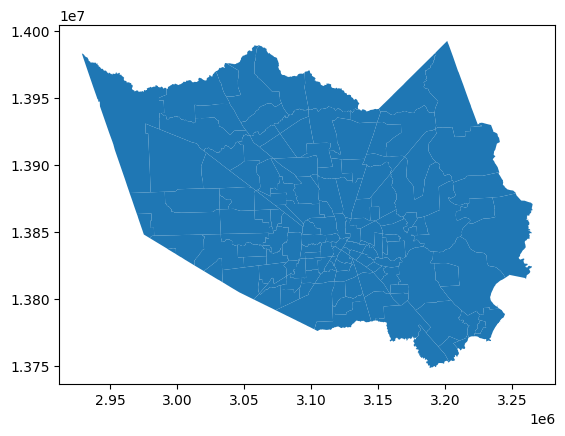

In [155]:
# Read a GeoDataFrame from a file specified by the 'map' variable
# The file is expected to contain geospatial data, and the resulting GeoDataFrame is stored in the 'map_hs' variable.
map_hs = gpd.read_file(map)

# Plot the GeoDataFrame using the default plot method
# This visualizes the geospatial data, and the resulting plot is displayed.
map_hs.plot()

# Display the plot using Matplotlib
plt.show()

In [156]:
#Display the data and notice that we have "cta_name" and "cta_code" as in our main table
map_hs

,OBJECTID,cta_code,cta_name,Shape_Leng,Shape_Area,geometry
0,1,K001,Downtown,32438.647595,4.931039e+07,"POLYGON ((3123076.885 13844501.923, 3123173.04..."
1,2,K002,Near Northside,58125.504562,1.315426e+08,"POLYGON ((3126267.288 13858707.237, 3126555.10..."
2,3,K003,Fifth Ward,67347.212978,1.347943e+08,"POLYGON ((3129122.254 13857775.636, 3129078.72..."
3,4,K004,Kashmere Gardens,46698.307620,9.178992e+07,"POLYGON ((3139883.561 13860287.210, 3139980.47..."
4,5,K005,Denver Harbor / Port Houston,61282.631006,1.789637e+08,"POLYGON ((3153586.488 13849440.185, 3153538.57..."
...,...,...,...,...,...,...
138,139,K139,Highlands,92198.708936,3.844005e+08,"POLYGON ((3235458.898 13875493.192, 3235480.99..."
139,140,K140,Baytown,245342.573161,2.006998e+09,"POLYGON ((3254133.579 13876490.826, 3254185.58..."
140,141,K141,Katy: Harris,55906.776374,1.464373e+08,"POLYGON ((2980792.539 13863652.460, 2980803.17..."
141,142,K142,Waller,335583.536058,2.849278e+09,"POLYGON ((2929074.538 13983052.639, 2929173.46..."


Now equipped with our dataset and geospatial map, we're ready to visualize Houston's development. Starting with population trends, we'll seamlessly integrate education, median house prices, crime rates, and property data. Our goal is to present a concise and informative snapshot of Houston's socio-economic landscape for enhanced analysis and decision-making.

In [157]:
# Perform an inner join between the 'tabla_2021' DataFrame and the 'map_hs' GeoDataFrame
# The join is based on the 'cta_code' column, and the result is stored in the 'pop_2021' DataFrame.
pop_2021 = pd.merge(tabla_2021, map_hs, on='cta_code', how='inner')

# Select specific columns ('cta_name', 'geometry', 'totalPopGt25Est') from the 'pop_2021' DataFrame
# This creates a new DataFrame with only the specified columns.
pop_2021 = pop_2021[['cta_name', 'geometry', 'totalPopGt25Est']]

# Set the 'cta_name' column as the index of the 'pop_2021' DataFrame
# This can be useful for certain operations, and the modification is done in place.
pop_2021.set_index('cta_name', inplace=True)

# Display the modified 'pop_2021' DataFrame
pop_2021

,geometry,totalPopGt25Est
cta_name,,
Downtown,"POLYGON ((3123076.885 13844501.923, 3123173.04...",13845
Near Northside,"POLYGON ((3126267.288 13858707.237, 3126555.10...",17281
Fifth Ward,"POLYGON ((3129122.254 13857775.636, 3129078.72...",11279
Kashmere Gardens,"POLYGON ((3139883.561 13860287.210, 3139980.47...",6425
Denver Harbor / Port Houston,"POLYGON ((3153586.488 13849440.185, 3153538.57...",11101
...,...,...
Highlands,"POLYGON ((3235458.898 13875493.192, 3235480.99...",8557
Baytown,"POLYGON ((3254133.579 13876490.826, 3254185.58...",57380
Katy: Harris,"POLYGON ((2980792.539 13863652.460, 2980803.17...",8590


In [158]:
# Perform an inner join between the 'tabla_2010' DataFrame and the 'map_hs' GeoDataFrame
# The join is based on the 'cta_code' column, and the result is stored in the 'pop_2010' DataFrame.
pop_2010 = pd.merge(tabla_2010, map_hs, on='cta_code', how='inner')

# Select specific columns ('cta_name', 'geometry', 'totalPopGt25Est') from the 'pop_2010' DataFrame
# This creates a new DataFrame with only the specified columns.
pop_2010 = pop_2010[['cta_name', 'geometry', 'totalPopGt25Est']]

# Set the 'cta_name' column as the index of the 'pop_2010' DataFrame
# This can be useful for certain operations, and the modification is done in place.
pop_2010.set_index('cta_name', inplace=True)

# Display the modified 'pop_2010' DataFrame
pop_2010

,geometry,totalPopGt25Est
cta_name,,
Downtown,"POLYGON ((3123076.885 13844501.923, 3123173.04...",7625
Near Northside,"POLYGON ((3126267.288 13858707.237, 3126555.10...",15234
Fifth Ward,"POLYGON ((3129122.254 13857775.636, 3129078.72...",11034
Kashmere Gardens,"POLYGON ((3139883.561 13860287.210, 3139980.47...",6274
Denver Harbor / Port Houston,"POLYGON ((3153586.488 13849440.185, 3153538.57...",10698
...,...,...
Highlands,"POLYGON ((3235458.898 13875493.192, 3235480.99...",7036
Baytown,"POLYGON ((3254133.579 13876490.826, 3254185.58...",47392
Katy: Harris,"POLYGON ((2980792.539 13863652.460, 2980803.17...",6727


In [159]:
# Convert the 'pop_2021' and 'pop_2010' DataFrame to a GeoDataFrame using the GeoPandas constructor 'gpd.GeoDataFrame'
# This is done to explicitly create a GeoDataFrame from a DataFrame, which allows for geospatial operations.
pop_2010 = gpd.GeoDataFrame(pop_2010)
pop_2021 = gpd.GeoDataFrame(pop_2021)

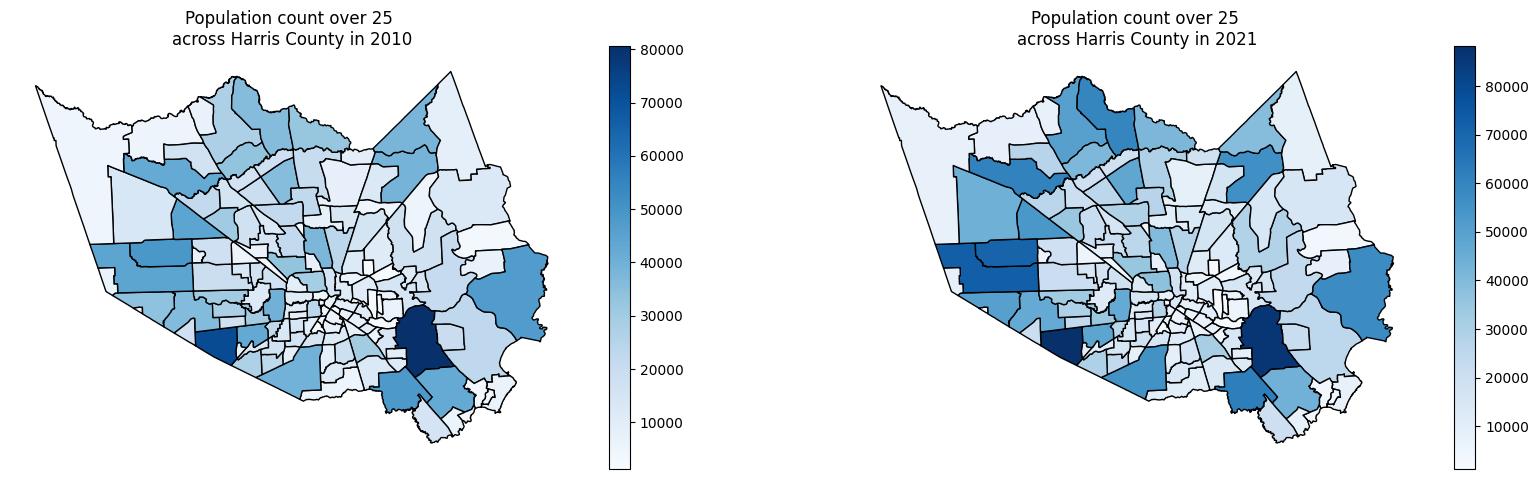

In [160]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot pop_2010 on the first subplot
pop_2010.plot(column='totalPopGt25Est', cmap='Blues', edgecolor='black',
              legend=True, ax=axs[0], legend_kwds={"shrink": 0.55})
axs[0].axis('off')  # Turn off the axis for the first subplot
axs[0].set_title('Population count over 25 \nacross Harris County in 2010')

# Plot pop_2021 on the second subplot
pop_2021.plot(column='totalPopGt25Est', cmap='Blues', edgecolor='black',
              legend=True, ax=axs[1], legend_kwds={"shrink": 0.55})
axs[1].axis('off')  # Turn off the axis for the second subplot
axs[1].set_title('Population count over 25 \nacross Harris County in 2021')

# Display the subplots
plt.show()

To streamline the plotting process, we'll create a convenient definition that facilitates easy visualization of our data.

In [161]:
# Define a function 'mapa_funcion' for creating choropleth maps using GeoDataFrames
# The function takes a GeoDataFrame ('geodf'), a column to visualize ('column'),
# a colormap ('color_map'), a title ('title'), and an optional figsize.

def mapa_funcion(geodf, column, color_map, title, figsize=(10, 10)):
    # Create a figure and axis using Matplotlib subplots, with the specified figsize
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the GeoDataFrame using the specified column for color, colormap, and edge color
    # A legend is included with specified properties, and the axis is assigned to 'ax'.
    geodf.plot(column=column, cmap=color_map, edgecolor='black',
               legend=True, legend_kwds={"shrink": 0.55}, ax=ax)

    # Turn off the axis for a cleaner visualization
    plt.axis('off')

    # Set the title of the plot
    plt.title(title)

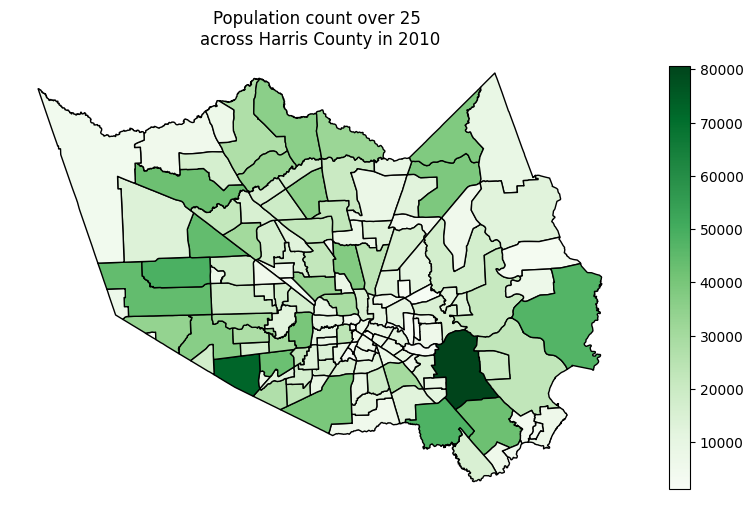

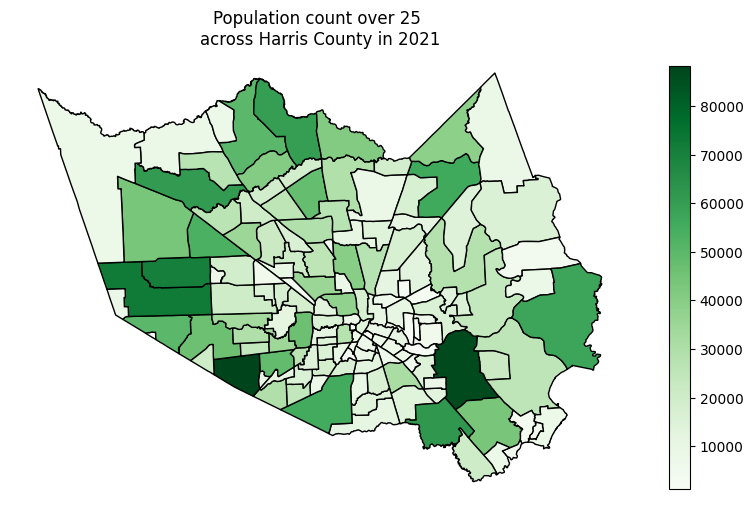

In [162]:
#Let's try our definition
# Call the mapa_funcion function for pop_2010
mapa_funcion(pop_2010, 'totalPopGt25Est', 'Greens', 'Population count over 25 \nacross Harris County in 2010', figsize=(10, 10))

# Call the mapa_funcion function for pop_2021
mapa_funcion(pop_2021, 'totalPopGt25Est', 'Greens', 'Population count over 25 \nacross Harris County in 2021', figsize=(10, 10))

# Display the plots
plt.show()

To enhance interactivity and provide a detailed breakdown of population numbers per neighborhood, we'll leverage the capabilities of Folium, Matplotlib, and Mapclassify. This combination will enable us to create dynamic and visually informative maps, offering a comprehensive view of population distribution across Houston's neighborhoods.

In [163]:
!pip install folium matplotlib mapclassify

In [164]:
pop_2010.explore(column='totalPopGt25Est',cmap='YlOrBr')

Output hidden; open in https://colab.research.google.com to view.

In [165]:
pop_2021.explore(column='totalPopGt25Est',cmap='YlOrBr')

Output hidden; open in https://colab.research.google.com to view.

Now, let's replicate the process for education, applying the same methodology to create informative visualizations and comparisons across Houston's neighborhoods.

In [175]:
edu_2010 = pd.merge(tabla_2010, map_hs, on='cta_code', how='inner')
edu_2010 = edu_2010[['cta_name','geometry','educLthsEstPct']]
edu_2010.set_index('cta_name', inplace=True)

edu_2021 = pd.merge(tabla_2021, map_hs, on='cta_code', how='inner')
edu_2021 = edu_2021[['cta_name','geometry','educLthsEstPct']]
edu_2021.set_index('cta_name', inplace=True)

In [176]:
edu_2010=gpd.GeoDataFrame(edu_2010)
edu_2021=gpd.GeoDataFrame(edu_2021)

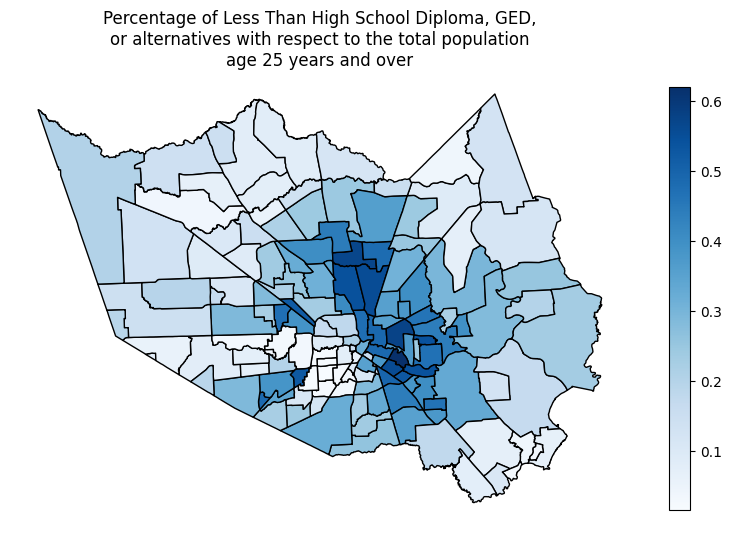

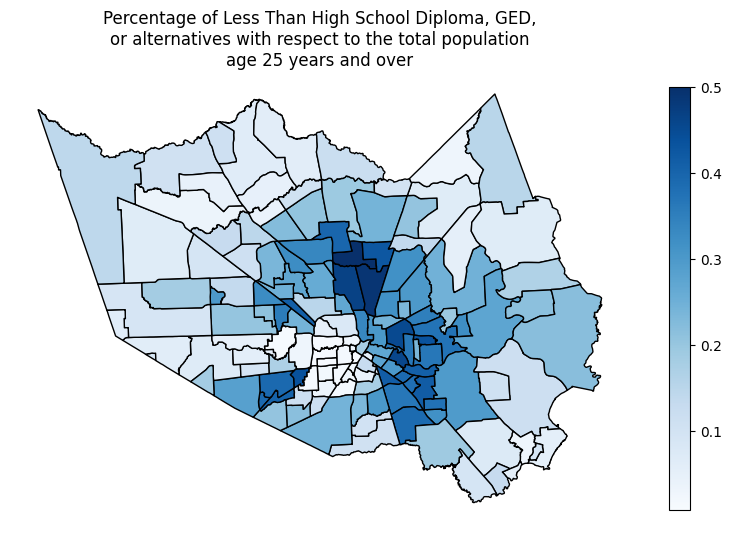

In [169]:
mapa_funcion(edu_2010,'educLthsEstPct','Blues','Percentage of Less Than High School Diploma, GED,\nor alternatives with respect to the total population\nage 25 years and over', figsize=(10, 10))
mapa_funcion(edu_2021,'educLthsEstPct','Blues','Percentage of Less Than High School Diploma, GED,\nor alternatives with respect to the total population\nage 25 years and over', figsize=(10, 10))
plt.show()

In [173]:
edu_2010.explore(column='educLthsEstPct',cmap='PuBuGn')

Output hidden; open in https://colab.research.google.com to view.

In [174]:
edu_2021.explore(column='educLthsEstPct',cmap='PuBuGn')

Output hidden; open in https://colab.research.google.com to view.

Finally, let's extend our analysis to median household data, employing a similar process to generate meaningful visualizations and comparisons for Houston's diverse neighborhoods.


In [177]:
mhouse_2010 = pd.merge(tabla_2010, map_hs, on='cta_code', how='inner')
mhouse_2010 = mhouse_2010[['cta_name','geometry','medHHIncEst']]
mhouse_2010.set_index('cta_name', inplace=True)

mhouse_2021 = pd.merge(tabla_2021, mapa_hs, on='cta_code', how='inner')
mhouse_2021 = mhouse_2021[['cta_name','geometry','medHHIncEst']]
mhouse_2021.set_index('cta_name', inplace=True)

In [178]:
mhouse_2010=gpd.GeoDataFrame(mhouse_2010)
mhouse_2021=gpd.GeoDataFrame(mhouse_2021)

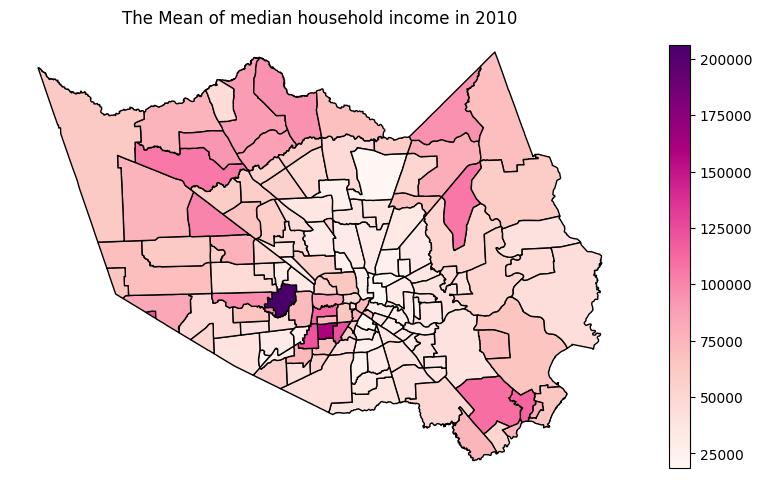

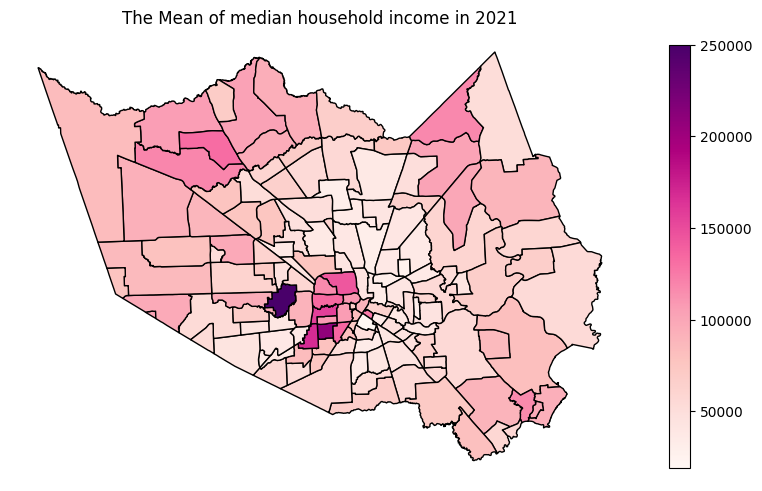

In [179]:
mapa_funcion(mhouse_2010,'medHHIncEst','RdPu','The Mean of median household income in 2010', figsize=(10, 10))
mapa_funcion(mhouse_2021,'medHHIncEst','RdPu','The Mean of median household income in 2021', figsize=(10, 10))
plt.show()

In [180]:
mhouse_2010.explore(column='medHHIncEst',cmap='BuPu')

Output hidden; open in https://colab.research.google.com to view.

In [182]:
mhouse_2021.explore(column='medHHIncEst',cmap='BuPu')

Output hidden; open in https://colab.research.google.com to view.

# Conslusion:

Data visualization has played an important role in our notebook, enabling a comprehensive exploration and comparison of three critical variables—population, education, and median household income—across different years in Houston. Through visually engaging representations, we have gained valuable insights into the dynamic patterns and trends within the city. The graphical depictions not only facilitate a more intuitive understanding of the data but also empower stakeholders to discern patterns, make informed decisions, and draw meaningful comparisons between the selected years. The use of visual aids has proven instrumental in transforming complex datasets into accessible and digestible information, underscoring the significance of data visualization as a powerful tool for conveying insights and promoting a deeper understanding of the presented data.